# ANN - Brain Tumor MRI Classification

Brain tumors are abnormal growths of cells within the brain, which can be life-threatening and require accurate diagnosis for effective treatment. MRI (Magnetic Resonance Imaging) is a non-invasive imaging technique widely used for the diagnosis and monitoring of brain tumors. In this notebook, we will develop a classification model to identify different types of brain tumors from MRI images using Artificial Neural Networks (ANN).

### Dataset Details
The dataset used in this notebook contains MRI images classified into four categories of brain tumors:

No Tumor - 0, Glioma Tumor - 1, Meningioma Tumor - 2, Pituitary Tumor - 3

Each MRI image is labeled according to these categories, allowing us to train and evaluate our classification models effectively.

### Section 1: Brain Tumor Classification Using TensorFlow
In this section, we will leverage TensorFlow, a powerful and widely-used deep learning library, to create, train, and evaluate a neural network model for classifying brain tumors from MRI images. TensorFlow provides high-level APIs that simplify the process of building and training neural networks, allowing us to focus on the overall architecture and performance of our model.

### Section 2: Brain Tumor Classification by Manually Implementing an ANN
In this section, we will take a deeper dive into the workings of neural networks by manually implementing all the necessary components from scratch. This includes defining the network architecture, initializing weights, implementing forward and backward propagation, and training the network. By doing so, we will gain a deeper understanding of the inner workings of ANNs and the mathematical principles behind them.

#### Let's get started!

## Importing Libraries

In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

## Importing Data

### Training set

In [2]:
training_path = "Training/"
training_folders = os.listdir(training_path)

labels = {
    "no_tumor" : 0,
    "glioma_tumor": 1,
    "meningioma_tumor": 2,
    "pituitary_tumor": 3
}

images = []
img_labels = []

for folder in training_folders:
        for img in os.listdir(training_path+folder):
            images.append(training_path+folder+"/"+img)
            img_labels.append(labels[folder])

training_data = pd.DataFrame({"filepath": images, "labels": img_labels})

In [3]:
training_data.head(10)

,filepath,labels
0,Training/glioma_tumor/gg (1).jpg,1
1,Training/glioma_tumor/gg (10).jpg,1
2,Training/glioma_tumor/gg (100).jpg,1
3,Training/glioma_tumor/gg (101).jpg,1
4,Training/glioma_tumor/gg (102).jpg,1
5,Training/glioma_tumor/gg (103).jpg,1
6,Training/glioma_tumor/gg (104).jpg,1
7,Training/glioma_tumor/gg (105).jpg,1
8,Training/glioma_tumor/gg (106).jpg,1
9,Training/glioma_tumor/gg (107).jpg,1


In [4]:
## Load Images
def load_images(img_path):
    image = Image.open(img_path)
    image = image.resize((256,256))
    return np.array(image)

training_data["image"] = training_data["filepath"].apply(load_images)

In [5]:
training_data.head(10)

,filepath,labels,image
0,Training/glioma_tumor/gg (1).jpg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,Training/glioma_tumor/gg (10).jpg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,Training/glioma_tumor/gg (100).jpg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,Training/glioma_tumor/gg (101).jpg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,Training/glioma_tumor/gg (102).jpg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
5,Training/glioma_tumor/gg (103).jpg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
6,Training/glioma_tumor/gg (104).jpg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
7,Training/glioma_tumor/gg (105).jpg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
8,Training/glioma_tumor/gg (106).jpg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
9,Training/glioma_tumor/gg (107).jpg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [6]:
training_data.shape

(2870, 3)

### Testing set

In [7]:
testing_path = "Testing/"
testing_folders = os.listdir(testing_path)

images = []
img_labels = []

for folder in testing_folders:
        for img in os.listdir(testing_path+folder):
            images.append(testing_path+folder+"/"+img)
            img_labels.append(labels[folder])

testing_data = pd.DataFrame({"filepath": images, "labels": img_labels})

In [8]:
testing_data.head(10)

,filepath,labels
0,Testing/glioma_tumor/image(1).jpg,1
1,Testing/glioma_tumor/image(10).jpg,1
2,Testing/glioma_tumor/image(100).jpg,1
3,Testing/glioma_tumor/image(11).jpg,1
4,Testing/glioma_tumor/image(12).jpg,1
5,Testing/glioma_tumor/image(13).jpg,1
6,Testing/glioma_tumor/image(14).jpg,1
7,Testing/glioma_tumor/image(15).jpg,1
8,Testing/glioma_tumor/image(16).jpg,1
9,Testing/glioma_tumor/image(17).jpg,1


In [9]:
testing_data["image"] = testing_data["filepath"].apply(load_images)

In [10]:
testing_data.head(10)

,filepath,labels,image
0,Testing/glioma_tumor/image(1).jpg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,Testing/glioma_tumor/image(10).jpg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,Testing/glioma_tumor/image(100).jpg,1,"[[[7, 7, 7], [7, 7, 7], [7, 7, 7], [7, 7, 7], ..."
3,Testing/glioma_tumor/image(11).jpg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,Testing/glioma_tumor/image(12).jpg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
5,Testing/glioma_tumor/image(13).jpg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
6,Testing/glioma_tumor/image(14).jpg,1,"[[[16, 16, 16], [3, 3, 3], [2, 2, 2], [0, 0, 0..."
7,Testing/glioma_tumor/image(15).jpg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
8,Testing/glioma_tumor/image(16).jpg,1,"[[[209, 209, 209], [95, 95, 95], [0, 0, 0], [0..."
9,Testing/glioma_tumor/image(17).jpg,1,"[[[11, 11, 11], [11, 11, 11], [11, 11, 11], [1..."


In [13]:
testing_data.shape

(394, 3)

## Data Preprocessing

In [37]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  2870 non-null   object
 1   labels    2870 non-null   int64 
 2   image     2870 non-null   object
dtypes: int64(1), object(2)
memory usage: 67.4+ KB


In [41]:
training_data["labels"].value_counts().sort_index()

0    395
1    826
2    822
3    827
Name: labels, dtype: int64

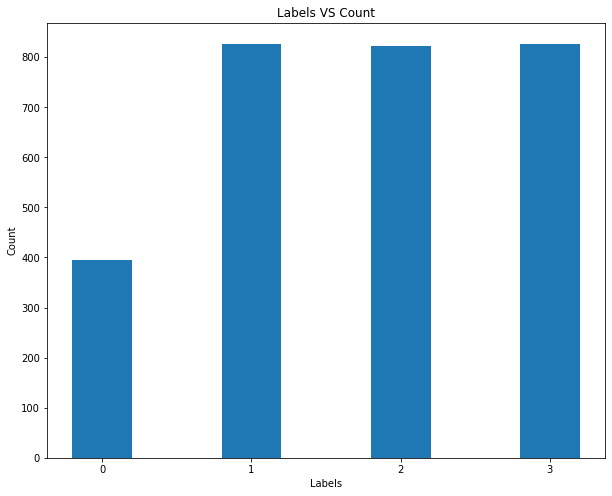

In [42]:
plt.figure(figsize=(10,8))
labels_count = training_data["labels"].value_counts().sort_index()
plt.bar(labels_count.index.astype(str), labels_count.values, width=0.4)
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Labels VS Count")
plt.show()

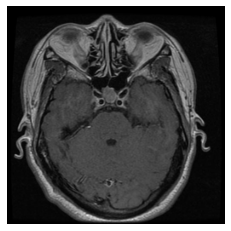

In [137]:
random_img = random.randint(0, training_data.shape[0]-1)

img_array = training_data["image"][random_img]

plt.imshow(img_array)
plt.axis("off")
plt.show()

## Section - 1

### Using TensorFlow